<a href="https://colab.research.google.com/github/GunisheetySukruti/AIML_52152/blob/main/AIML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
mylist=["suchi", "sukruti", "ashritha", "nithya"]
print(mylist)
print(mylist[3])
print(type(mylist))


['suchi', 'sukruti', 'ashritha', 'nithya']
nithya
<class 'list'>


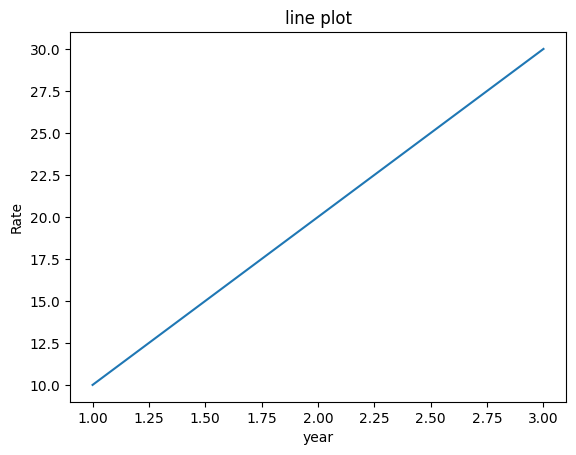

In [13]:
import matplotlib.pyplot as plt
x=[1,2,3]
y=[10,20,30]
plt.plot(x,y)
plt.xlabel("year")
plt.ylabel("Rate")
plt.title("line plot")
plt.show()

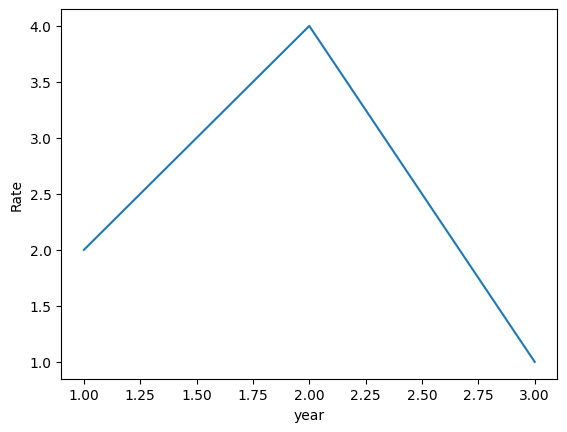

In [14]:
import matplotlib.pyplot as plt
x=[1,2,3]
y=[2,4,1]
plt.plot(x,y)
plt.xlabel("year")
plt.ylabel("Rate")
plt.show()

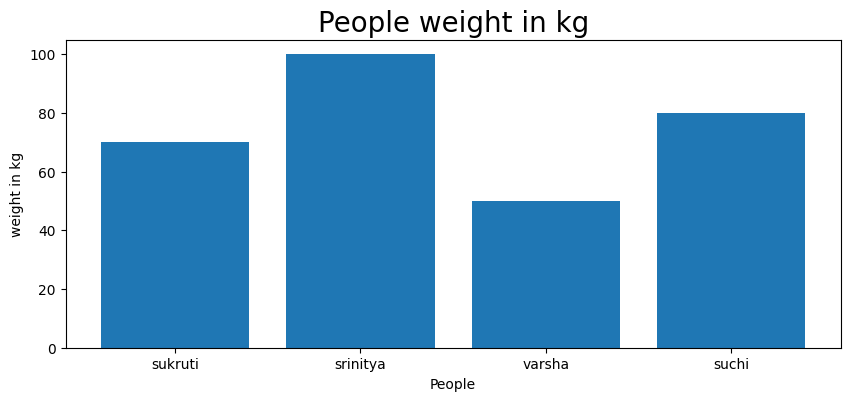

In [15]:
import matplotlib.pyplot as plt
people=["sukruti","srinitya","varsha","suchi"]
age=[16,30,21,18]
weight=[70,100,50,80]
plt.figure(figsize=(10,4))
plt.title("People weight in kg",fontsize=20)
plt.bar(x=people,height=weight)
plt.xlabel("People")
plt.ylabel("weight in kg")
plt.show()

In [12]:
from queue import Queue # Import the Queue class from the queue module

def bfs(graph,source):
  Q=Queue()
  visited_states=set()
  Q.put(source)
  visited_states.update({source})
  while not Q.empty():
    vertex=Q.get()
    print(vertex,end="-->") # Changed 'ends' to 'end'
    for u in graph[vertex]:
      if u not in visited_states:
        Q.put(u)
        visited_states.update({u})
# Define the graph before calling bfs
graph = {
    1: [2, 3],
    2: [4, 5],
    3: [6],
    4: [],
    5: [],
    6: []
}
print("BFS tranversal of graph with source 1 is:")
bfs(graph, 1) # Pass the graph and source node to the bfs function

BFS tranversal of graph with source 1 is:
1-->2-->3-->4-->5-->6-->

In [5]:
graph={
    'A':['B','C','G'],
    'B': ['A'],
    'C': ['A','D','F'],
    'D':['A','C','E','H'],
    'E': ['D','H','F'],
    'F': ['C','E'],
    'G': ['A','D','H'],
    'H': ['D','G','E'],
}
def dfs(graph,node,visited):
    if node not in visited:
        visited.append(node)
        for k in graph[node]:
            dfs(graph,k,visited)
    return visited
visited=(dfs(graph,'B',[]))
print(visited)

['B', 'A', 'C', 'D', 'E', 'H', 'G', 'F']


In [11]:
#ASSIGNMENT -2

from queue import Queue
graph={0:[1,2,3],
       1:[0,2],
       2:[1,3,5],
       3:[0,2,4],
       4:[3,5,7],
       5:[2,4,6,7],
       6:[5,7],
       7:[]}
print("The adjacency List representing the graph is:")
print(graph)
def bfs(graph, source):
  Q=Queue()
  visited_vertices=set()
  Q.put(source)
  visited_vertices.update({source})
  while not Q.empty():
    vertex=Q.get()
    print(vertex,end="-->")
    for u in graph [vertex]:
      if u not in visited_vertices:
        Q.put(u)
        visited_vertices.update({u})
print("BFS traversal of graph with source 1 is:")
bfs(graph,1)

The adjacency List representing the graph is:
{0: [1, 2, 3], 1: [0, 2], 2: [1, 3, 5], 3: [0, 2, 4], 4: [3, 5, 7], 5: [2, 4, 6, 7], 6: [5, 7], 7: []}
BFS traversal of graph with source 1 is:
1-->0-->2-->3-->5-->4-->6-->7-->

ASSIGNMENT-***3***

In [20]:
from collections import namedtuple, Counter, defaultdict
import random
import math
import functools
cache = functools.lru_cache(10**6)

In [18]:

class Game:
    """A game is similar to a problem, but it has a terminal test instead of
    a goal test, and a utility for each terminal state. To create a game,
    subclass this class and implement `actions`, `result`, `is_terminal`,
    and `utility`. You will also need to set the .initial attribute to the
    initial state; this can be done in the constructor."""

    def actions(self, state):
        """Return a collection of the allowable moves from this state."""
        raise NotImplementedError

    def result(self, state, move):
        """Return the state that results from making a move from a state."""
        raise NotImplementedError

    def is_terminal(self, state):
        """Return True if this is a final state for the game."""
        return not self.actions(state)

    def utility(self, state, player):
        """Return the value of this final state to player."""
        raise NotImplementedError


In [19]:
def play_game(game, strategies: dict, verbose=False):
    """Play a turn-taking game. `strategies` is a {player_name: function} dict,
    where function(state, game) is used to get the player's move."""
    state = game.initial
    while not game.is_terminal(state):
        player = state.to_move
        move = strategies[player](game, state)
        state = game.result(state, move)
        if verbose:
            print('Player', player, 'move:', move)
            print(state)
    return state

In [21]:
def minimax_search(game, state):
    """Search game tree to determine best move; return (value, move) pair."""

    player = state.to_move

    def max_value(state):
        if game.is_terminal(state):
            return game.utility(state, player), None
        v, move = -infinity, None
        for a in game.actions(state):
            v2, _ = min_value(game.result(state, a))
            if v2 > v:
                v, move = v2, a
        return v, move

    def min_value(state):
        if game.is_terminal(state):
            return game.utility(state, player), None
        v, move = +infinity, None
        for a in game.actions(state):
            v2, _ = max_value(game.result(state, a))
            if v2 < v:
                v, move = v2, a
        return v, move

    return max_value(state)

infinity = math.inf

In [24]:
def alphabeta_search(game, state):
    """Search game to determine best action; use alpha-beta pruning.
    ""Search all the way to the leaves."""

    player = state.to_move

    def max_value(state, alpha, beta):
        if game.is_terminal(state):
            return game.utility(state, player), None
        v, move = -infinity, None
        for a in game.actions(state):
            v2, _ = min_value(game.result(state, a), alpha, beta)
            if v2 > v:
                v, move = v2, a
                alpha = max(alpha, v)
            if v >= beta:
                return v, move
        return v, move

    def min_value(state, alpha, beta):
        if game.is_terminal(state):
            return game.utility(state, player), None
        v, move = +infinity, None
        for a in game.actions(state):
            v2, _ = max_value(game.result(state, a), alpha, beta)
            if v2 < v:
                v, move = v2, a
                beta = min(beta, v)
            if v <= alpha:
                return v, move
        return v, move

    return max_value(state, -infinity, +infinity)

In [25]:
class TicTacToe(Game):
    """Play TicTacToe on an `height` by `width` board, needing `k` in a row to win.
    'X' plays first against 'O'."""

    def __init__(self, height=3, width=3, k=3):
        self.k = k # k in a row
        self.squares = {(x, y) for x in range(width) for y in range(height)}
        self.initial = Board(height=height, width=width, to_move='X', utility=0)

    def actions(self, board):
        """Legal moves are any square not yet taken."""
        return self.squares - set(board)

    def result(self, board, square):
        """Place a marker for current player on square."""
        player = board.to_move
        board = board.new({square: player}, to_move=('O' if player == 'X' else 'X'))
        win = k_in_row(board, player, square, self.k)
        board.utility = (0 if not win else +1 if player == 'X' else -1)
        return board

    def utility(self, board, player):
        """Return the value to player; 1 for win, -1 for loss, 0 otherwise."""
        return board.utility if player == 'X' else -board.utility

    def is_terminal(self, board):
        """A board is a terminal state if it is won or there are no empty squares."""
        return board.utility != 0 or len(self.squares) == len(board)

    def display(self, board): print(board)


def k_in_row(board, player, square, k):
    """True if player has k pieces in a line through square."""
    def in_row(x, y, dx, dy): return 0 if board[x, y] != player else 1 + in_row(x + dx, y + dy, dx, dy)
    return any(in_row(*square, dx, dy) + in_row(*square, -dx, -dy)-1>=k
               for (dx, dy) in ((0, 1), (1, 0), (1, 1), (1, -1)))

In [26]:
class Board(defaultdict):
    """A board has the player to move, a cached utility value,
    and a dict of {(x, y): player} entries, where player is 'X' or 'O'."""
    empty = '.'
    off = '#'

    def __init__(self, width=8, height=8, to_move=None, **kwds):
        self.__dict__.update(width=width, height=height, to_move=to_move, **kwds)

    def new(self, changes: dict, **kwds) -> 'Board':
        "Given a dict of {(x, y): contents} changes, return a new Board with the changes."
        board = Board(width=self.width, height=self.height, **kwds)
        board.update(self)
        board.update(changes)
        return board

    def __missing__(self, loc):
        x, y = loc
        if 0 <= x < self.width and 0 <= y < self.height:
            return self.empty
        else:
            return self.off

    def __hash__(self):
        return hash(tuple(sorted(self.items()))) + hash(self.to_move)

    def __repr__(self):
        def row(y): return ' '.join(self[x, y] for x in range(self.width))
        return '\n'.join(map(row, range(self.height))) +  '\n'

In [27]:
def random_player(game, state): return random.choice(list(game.actions(state)))

def player(search_algorithm):
    """A game player who uses the specified search algorithm"""
    return lambda game, state: search_algorithm(game, state)[1]

In [28]:
play_game(TicTacToe(), dict(X=random_player, O=player(alphabeta_search)), verbose=True).utility

Player X move: (0, 1)
. . .
X . .
. . .

Player O move: (2, 1)
. . .
X . O
. . .

Player X move: (0, 2)
. . .
X . O
X . .

Player O move: (0, 0)
O . .
X . O
X . .

Player X move: (1, 1)
O . .
X X O
X . .

Player O move: (2, 0)
O . O
X X O
X . .

Player X move: (1, 2)
O . O
X X O
X X .

Player O move: (1, 0)
O O O
X X O
X X .



-1

In [29]:
play_game(TicTacToe(), dict(X=player(alphabeta_search), O=player(minimax_search)), verbose=True).utility

Player X move: (0, 1)
. . .
X . .
. . .

Player O move: (2, 1)
. . .
X . O
. . .

Player X move: (1, 2)
. . .
X . O
. X .

Player O move: (0, 0)
O . .
X . O
. X .

Player X move: (1, 1)
O . .
X X O
. X .

Player O move: (1, 0)
O O .
X X O
. X .

Player X move: (2, 0)
O O X
X X O
. X .

Player O move: (0, 2)
O O X
X X O
O X .

Player X move: (2, 2)
O O X
X X O
O X X



0